In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
reviews_datasets=pd.read_csv('D:/so-data/cordova-posts.csv'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Id  AcceptedAnswerId  AnswerCount  \
0    475553            475576            3   
1    957076            957273            4   
2   2010956           2020385            1   
3    838069            848302            5   
4    937724            947072            2   
5   2233292           2233312            7   
6   1791298           1793588            1   
7   2096328           2243265            3   
8    773843           1505805           10   
9   4147376           4195753            4   
10  3939333           3939364            1   
11  3974122           3979543            1   
12  3930277           3982919            2   
13  4066167           4089874           20   
14  3897530           3941900            2   
15  4195534           4199452            2   
16  3958612           4246540            7   
17  3983893           3984181            1   
18  3075468           3076946            4   
19  4039428           4049250            8   

                                 

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
reviews_datasets.dropna()


# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title'] +' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
0,475553,475576,3,<p>I wonder if I can test landscape view using...,NaN,0,NaN,2009-01-24 05:16:54.267,5,2016-11-16 12:31:53.453,...,42,<cocoa-touch><cordova><ios-simulator>,How can I test landscape view using the iPhone...,52618,"<p><img src=""https://i.imgur.com/zKnTZ9Y.png?1...",2009-01-24 05:37:23.413,1229.0,How can I test landscape view using the iPhone...,1,How can I test landscape view using the iPhone...
1,957076,957273,4,<p>What JavaScript Mobile development tool wou...,2015-04-20 17:02:40.937,0,NaN,2009-06-05 17:20:44.613,1,2010-02-16 17:38:44.317,...,3,<javascript><iphone><android><cordova><xui>,QuickConnect vs Phonegap,4051,<p>I found Phonegap to be the easiest to use. ...,2009-06-05 18:09:59.420,2955.0,QuickConnect vs Phonegap <p>What JavaScript Mo...,1,QuickConnect vs Phonegap <p>What JavaScript Mo...
2,2010956,2020385,1,<p>I'm using PhoneGap 0.8 and I'd like to dete...,NaN,0,NaN,2010-01-06 04:28:49.527,3,2010-03-02 07:48:13.103,...,2,<iphone><accelerometer><cordova><gesture-recog...,How can I detect a shake gesture in PhoneGap 0.8?,3825,<p>Your first link is using <code>PhoneGap.Ges...,2010-01-07 12:58:00.680,116951.0,How can I detect a shake gesture in PhoneGap 0...,1,How can I detect a shake gesture in PhoneGap 0...
3,838069,848302,5,<p>I'm tyring to get phonegap up and running o...,NaN,3,NaN,2009-05-08 03:09:39.223,1,2019-03-15 23:01:25.430,...,3,<browser><blackberry><touchscreen><cordova><ri...,Why does google.com look different on blackber...,2137,<p>Disclaimer: I don't know anything about pho...,2009-05-11 14:11:01.043,298882.0,Why does google.com look different on blackber...,1,Why does google.com look different on blackber...
4,937724,947072,2,<p>I recently stumbled into PhoneGap and I lov...,NaN,3,NaN,2009-06-02 02:48:55.373,5,2010-03-05 15:51:13.780,...,4,<iphone><android><blackberry><cordova>,"Mobile Development for iPhone, Android, and Bl...",1452,"<p>There are about 3 different frameworks, Pho...",2009-06-03 20:34:54.970,150359.0,"Mobile Development for iPhone, Android, and Bl...",1,"Mobile Development for iPhone, Android, and Bl..."


In [6]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['How can I test landscape view using the iPhone Simulator? I wonder if I can test landscape view using simulator?', 'QuickConnect vs Phonegap What JavaScript Mobile development tool would you use based on momentum, existing documentation and functionality, and ability to get passed the App Stores strict policies?', 'How can I detect a shake gesture in PhoneGap .? Im using PhoneGap . and Id like to detect a basic shake gesture. Ive found two relevant snippets http//groups.google.com/group/phonegap/browse_thread/thread/bebef http//phonegap.pbworks.com/Handling-Shake-Events Neither of them are working for me. Unfortunately the documentation seems a little outdated and the API reference for PhoneGap is just a bunch of tests. I know it can be done I just dont have a known good starting point. If anyone can provide a short snippet of shake detection code for PhoneGap that they know works for them I would be much obliged. Thanks for your time!']


In [9]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['how', 'can', 'test', 'landscape', 'view', 'using', 'the', 'iphone', 'simulator', 'wonder', 'if', 'can', 'test', 'landscape', 'view', 'using', 'simulator'], ['quickconnect', 'vs', 'phonegap', 'what', 'javascript', 'mobile', 'development', 'tool', 'would', 'you', 'use', 'based', 'on', 'momentum', 'existing', 'documentation', 'and', 'functionality', 'and', 'ability', 'to', 'get', 'passed', 'the', 'app', 'stores', 'strict', 'policies'], ['how', 'can', 'detect', 'shake', 'gesture', 'in', 'phonegap', 'im', 'using', 'phonegap', 'and', 'id', 'like', 'to', 'detect', 'basic', 'shake', 'gesture', 'ive', 'found', 'two', 'relevant', 'snippets', 'http', 'groups', 'google', 'com', 'group', 'phonegap', 'browse_thread', 'thread', 'bebef', 'http', 'phonegap', 'pbworks', 'com', 'handling', 'shake', 'events', 'neither', 'of', 'them', 'are', 'working', 'for', 'me', 'unfortunately', 'the', 'documentation', 'seems', 'little', 'outdated', 'and', 'the', 'api', 'reference', 'for', 'phonegap', 'is', 'just', '

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['why', 'does', 'google', 'com', 'look', 'different', 'on', 'blackberry', 'phonegap', 'vs', 'blackberry', 'browser', 'im', 'tyring', 'to', 'get', 'phonegap', 'up', 'and', 'running', 'on', 'blackberry', 'storm', 'simulator', 'had', 'been', 'testing', 'my', 'webapp', 'from', 'withing', 'bbs', 'built', 'in', 'browser', 'and', 'it', 'was', 'looking', 'ok', 'but', 'then', 'it', 'totally', 'bit', 'once', 'tried', 'to', 'look', 'at', 'the', 'some', 'code', 'from', 'within', 'phonegap', 'even', 'though', 'was', 'pointing', 'phonegap', 'to', 'the', 'same', 'url', 'hadnt', 'yet', 'gotten', 'to', 'the', 'point', 'of', 'running', 'code', 'locally', 'on', 'the', 'device', 'tried', 'test', 'case', 'on', 'google', 'and', 'got', 'similiar', 'results', 'see', 'below', 'suspect', 'that', 'im', 'missing', 'something', 'basic', 'here', 'would', 'have', 'expect', 'both', 'images', 'to', 'be', 'nearly_identical', 'browser', 'http', 'www', 'com', 'outside', 'jpg', 'phonegap', 'http', 'www', 'com', 'outside',

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
0,475553,475576,3,<p>I wonder if I can test landscape view using...,NaN,0,NaN,2009-01-24 05:16:54.267,5,2016-11-16 12:31:53.453,...,42,<cocoa-touch><cordova><ios-simulator>,How can I test landscape view using the iPhone...,52618,"<p><img src=""https://i.imgur.com/zKnTZ9Y.png?1...",2009-01-24 05:37:23.413,1229.0,How can I test landscape view using the iPhone...,1,How can I test landscape view using the iPhone...
1,957076,957273,4,<p>What JavaScript Mobile development tool wou...,2015-04-20 17:02:40.937,0,NaN,2009-06-05 17:20:44.613,1,2010-02-16 17:38:44.317,...,3,<javascript><iphone><android><cordova><xui>,QuickConnect vs Phonegap,4051,<p>I found Phonegap to be the easiest to use. ...,2009-06-05 18:09:59.420,2955.0,QuickConnect vs Phonegap <p>What JavaScript Mo...,1,QuickConnect vs Phonegap <p>What JavaScript Mo...
2,2010956,2020385,1,<p>I'm using PhoneGap 0.8 and I'd like to dete...,NaN,0,NaN,2010-01-06 04:28:49.527,3,2010-03-02 07:48:13.103,...,2,<iphone><accelerometer><cordova><gesture-recog...,How can I detect a shake gesture in PhoneGap 0.8?,3825,<p>Your first link is using <code>PhoneGap.Ges...,2010-01-07 12:58:00.680,116951.0,How can I detect a shake gesture in PhoneGap 0...,1,How can I detect a shake gesture in PhoneGap 0...
3,838069,848302,5,<p>I'm tyring to get phonegap up and running o...,NaN,3,NaN,2009-05-08 03:09:39.223,1,2019-03-15 23:01:25.430,...,3,<browser><blackberry><touchscreen><cordova><ri...,Why does google.com look different on blackber...,2137,<p>Disclaimer: I don't know anything about pho...,2009-05-11 14:11:01.043,298882.0,Why does google.com look different on blackber...,1,Why does google.com look different on blackber...
4,937724,947072,2,<p>I recently stumbled into PhoneGap and I lov...,NaN,3,NaN,2009-06-02 02:48:55.373,5,2010-03-05 15:51:13.780,...,4,<iphone><android><blackberry><cordova>,"Mobile Development for iPhone, Android, and Bl...",1452,"<p>There are about 3 different frameworks, Pho...",2009-06-03 20:34:54.970,150359.0,"Mobile Development for iPhone, Android, and Bl...",1,"Mobile Development for iPhone, Android, and Bl..."
5,2233292,2233312,7,<p>I want to build a relatively simple version...,NaN,2,NaN,2010-02-09 23:24:46.513,5,2014-03-19 12:31:42.353,...,20,<jquery><iphone><android><mobile><jquery-mobile>,jQuery and mobile browser compatibility?,27984,<p>jQuery should work fine on at least the And...,2010-02-09 23:28:09.117,203.0,jQuery and mobile browser compatibility? <p>I ...,1,jQuery and mobile browser compatibility? <p>I ...
6,1791298,1793588,1,<p>I am trying to send a POST request to Drupa...,NaN,1,NaN,2009-11-24 16:41:43.087,1,2010-06-09 21:00:08.937,...,0,<iphone><json><drupal><jsonp><cordova>,Drupal JSON POST from PhoneGap,4431,"<p>So i figured it out, It had to do with conf...",2009-11-24 23:10:18.710,23315.0,Drupal JSON POST from PhoneGap <p>I am trying ...,1,Drupal JSON POST from PhoneGap <p>I am trying ...
7,2096328,2243265,3,<p>I have created a search field on a mobile a...,NaN,0,NaN,2010-01-19 19:18:08.563,3,2018-05-07 15:46:24.907,...,7,<javascript><iphone><cordova>,Getting Search Keyboard on iPhone using PhoneGap,9717,<p>Use</p>\n\n<pre><code>&lt;form&gt; ...\n&lt...,2010-02-11 08:57:49.847,1949981.0,Getting Search Keyboard on iPhone using PhoneG...,1,Getting Search Keyboard on iPhone using PhoneG...
8,773843,1505805,10,<p>I'm experimenting with PhoneGap to develop ...,NaN,3,NaN,2009-04-21 18:06:17.257,19,2017-12-10 15:59:36.850,...,61,<iphone><keyboard><uiwebview><cordova>,iPhone UIWebview: How to force a numeric keybo...,62411,<p>It looks like Mobile Safari supports the ne...,2009-10-01 18:57:12.590,14086255.0,iPhone UIWebview: How to force a numeric keybo...,1,iPhone UIWebview: How to force a numeric keybo...
9,4147376,4195753,4,<p>By default

In [17]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['test', 'landscape', 'view', 'use', 'iphone', 'simulator', 'wonder', 'test', 'landscape', 'view', 'use', 'simulator'], ['quickconnect', 'phonegap', 'javascript', 'mobile', 'development', 'tool', 'use', 'base', 'momentum', 'exist', 'documentation', 'functionality', 'ability', 'get', 'pass', 'app', 'store', 'strict', 'policy']]


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,475553,475576,3,<p>I wonder if I can test landscape view using...,NaN,0,NaN,2009-01-24 05:16:54.267,5,2016-11-16 12:31:53.453,...,How can I test landscape view using the iPhone...,52618,"<p><img src=""https://i.imgur.com/zKnTZ9Y.png?1...",2009-01-24 05:37:23.413,1229.0,How can I test landscape view using the iPhone...,1,How can I test landscape view using the iPhone...,"[test, landscape, view, use, iphone, simulator...",How can I test landscape view using the iPhone...
1,957076,957273,4,<p>What JavaScript Mobile development tool wou...,2015-04-20 17:02:40.937,0,NaN,2009-06-05 17:20:44.613,1,2010-02-16 17:38:44.317,...,QuickConnect vs Phonegap,4051,<p>I found Phonegap to be the easiest to use. ...,2009-06-05 18:09:59.420,2955.0,QuickConnect vs Phonegap <p>What JavaScript Mo...,1,QuickConnect vs Phonegap <p>What JavaScript Mo...,"[quickconnect, phonegap, javascript, mobile, d...",QuickConnect vs Phonegap <p>What JavaScript Mo...
2,2010956,2020385,1,<p>I'm using PhoneGap 0.8 and I'd like to dete...,NaN,0,NaN,2010-01-06 04:28:49.527,3,2010-03-02 07:48:13.103,...,How can I detect a shake gesture in PhoneGap 0.8?,3825,<p>Your first link is using <code>PhoneGap.Ges...,2010-01-07 12:58:00.680,116951.0,How can I detect a shake gesture in PhoneGap 0...,1,How can I detect a shake gesture in PhoneGap 0...,"[detect, shake_gesture, phonegap, m, use, phon...",How can I detect a shake gesture in PhoneGap 0...
3,838069,848302,5,<p>I'm tyring to get phonegap up and running o...,NaN,3,NaN,2009-05-08 03:09:39.223,1,2019-03-15 23:01:25.430,...,Why does google.com look different on blackber...,2137,<p>Disclaimer: I don't know anything about pho...,2009-05-11 14:11:01.043,298882.0,Why does google.com look different on blackber...,1,Why does google.com look different on blackber...,"[google, com, look, different, blackberry, pho...",Why does google.com look different on blackber...
4,937724,947072,2,<p>I recently stumbled into PhoneGap and I lov...,NaN,3,NaN,2009-06-02 02:48:55.373,5,2010-03-05 15:51:13.780,...,"Mobile Development for iPhone, Android, and Bl...",1452,"<p>There are about 3 different frameworks, Pho...",2009-06-03 20:34:54.970,150359.0,"Mobile Development for iPhone, Android, and Bl...",1,"Mobile Development for iPhone, Android, and Bl...","[mobile, development, iphone, android, blackbe...","Mobile Development for iPhone, Android, and Bl..."
5,2233292,2233312,7,<p>I want to build a relatively simple version...,NaN,2,NaN,2010-02-09 23:24:46.513,5,2014-03-19 12:31:42.353,...,jQuery and mobile browser compatibility?,27984,<p>jQuery should work fine on at least the And...,2010-02-09 23:28:09.117,203.0,jQuery and mobile browser compatibility? <p>I ...,1,jQuery and mobile browser compatibility? <p>I ...,"[jquery, mobile, browser, compatibility, want,...",jQuery and mobile browser compatibility? <p>I ...
6,1791298,1793588,1,<p>I am trying to send a POST request to Drupa...,NaN,1,NaN,2009-11-24 16:41:43.087,1,2010-06-09 21:00:08.937,...,Drupal JSON POST from PhoneGap,4431,"<p>So i figured it out, It had to do with conf...",2009-11-24 23:10:18.710,23315.0,Drupal JSON POST from PhoneGap <p>I am trying ...,1,Drupal JSON POST from PhoneGap <p>I am trying ...,"[drupal, json, post, phonegap, try, send, post...",Drupal JSON POST from PhoneGap <p>I am trying ...
7,2096328,2243265,3,<p>I have created a search field on a mobile a...,NaN,0,NaN,2010-01-19 19:18:08.563,3,2018-05-07 15:46:24.907,...,Getting Search Keyboard on iPhone using PhoneGap,9717,<p>Use</p>\n\n<pre><code>&lt;form&gt; ...\n&lt...,2010-02-11 08:57:49.847,1949981.0,Getting Search Keyboard on iPhone using PhoneG...,1,Getting Search Keyboard on iPhone using PhoneG...,"[get, search, keyboard, iphone, use, phonegap,...",Getting Search Keyboard on iPhone using 

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10
15
20
25
30
35
40
45
50


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


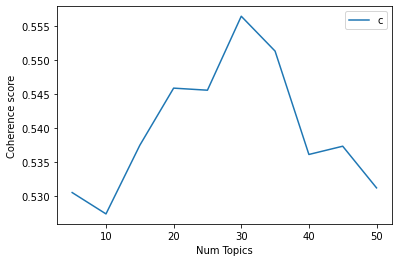

In [22]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

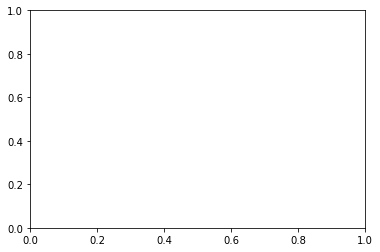

In [18]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(25, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
for i in iteration_based_coherence_values:
    print(i)

0.5387227755383208
0.5525825309378027
0.5489850881875098
0.5508073579151707
0.5474201354115582
0.5508969070916435


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, iterations=1000, alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_csv("D:/so-data/cordova_topic_keywords.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents2, contents], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'title', 'texts']
df_dominant_topic.to_csv("D:/so-data/final_topics_cordova.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
